In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns

In [2]:
#define the dataframe, took a lot of searching to figure out proper encoding
wellcome_apc_spend = pd.read_csv('WELLCOME.csv', encoding ='latin1')

In [3]:
wellcome_apc_spend

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,£2392.20
6,PMC3709265,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,£2367.95
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,£649.33
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,£1294.78


In [4]:
#learn the sive and attributes of the data set
wellcome_apc_spend.describe()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
count,1928,2127,2126,2127,2127
unique,1880,299,984,2126,1402
top,Not yet available,Elsevier,PLoS One,"Exclusive breastfeeding, diarrhoel morbidity a...",£2040.00
freq,7,387,92,2,94


In [5]:
#Many publishers written in different ways

## Determine the five most common journals and the total articles for each


In [6]:
wellcome_apc_spend['Journal title']

0                                  Psychological Medicine
1                                       Biomacromolecules
2                                              J Med Chem
3                                              J Med Chem
4                                              J Org Chem
5                          Journal of Medicinal Chemistry
6                            Journal of Proteome Research
7                                               Mol Pharm
8                                    ACS Chemical Biology
9                                    ACS Chemical Biology
10           Journal of Chemical Information and Modeling
11                         Journal of Medicinal Chemistry
12                         Journal of Medicinal Chemistry
13                                           Biochemistry
14                         Journal of Medicinal Chemistry
15                                       Gastroenterology
16                        Journal of Biological Chemistry
17            

In [7]:
#They have multiple names for the various Journals, need to aggregate

In [15]:
wellcome_apc_spend['Journal title'] = wellcome_apc_spend['Journal title'].str.upper()

In [16]:
#Journals have been capitalized differently for the same journal

In [17]:
wellcome_apc_spend['Journal title'] = wellcome_apc_spend['Journal title'].replace(
    ['PLOSONE', 'PLOS ONE', 'PLOS 1', 'PLOS'], 'PLOS ONE') 

wellcome_apc_spend['Journal title'] = wellcome_apc_spend['Journal title'].replace(
    ['ACTA D', 'ACTA CRYSTALLOGRAPHICA SECTION D', 'ACTA CRYSTALLOGRAPHY D',
     'ACTA CRYSTALLOGRAPHICA, SECTION D', 'ACTA CRYSTALLOGRAPHICA SECTION D, BIOLOGICAL CRYSTALLOGRAPHY'],
    'ACTA CRYSTALLOGRAPHICA SECTION D: BIOLOGICAL CRYSTALLOGRAPHY') 

wellcome_apc_spend['Journal title'] = wellcome_apc_spend['Journal title'].replace(
    ['AMERICAN JNL EPIDEMIOLOGY'], 'AMERICAN JOURNAL OF EPIDEMIOLOGY') 

wellcome_apc_spend['Journal title'] = wellcome_apc_spend['Journal title'].replace(
    ['AMERICAN JOURNAL OF MEDICAL GENETICS PART A'], 'AMERICAN JOURNAL OF MEDICAL GENETICS') 

wellcome_apc_spend['Journal title'] = wellcome_apc_spend['Journal title'].replace(
    ['ANTIMICROBIAL AGENTS AND CHEMOTHERAPY', 'ANTIMICROBIAL AGFENTS AND CHEMOTHERAPY'],
    'ANTIMICROBIAL AGENTS & CHEMOTHERAPY') 

wellcome_apc_spend['Journal title'] = wellcome_apc_spend['Journal title'].replace(
    ['ANGEWANDE CHEMIE', 'ANGEWANDTE CHEMIE INTERNATIONAL EDITION','ANGEW CHEMS INT ED' ], 'ANGEWANDTE CHEMIE') 

wellcome_apc_spend['Journal title'] = wellcome_apc_spend['Journal title'].replace(
    ['BEHAVIOUR RESEARCH AND THERAPY'], 'BEHAVIOR RESEARCH & THERAPY')


In [18]:
wellcome_apc_spend['Journal title'].value_counts()

PLOS ONE                                                                   210
JOURNAL OF BIOLOGICAL CHEMISTRY                                             53
NEUROIMAGE                                                                  29
PLOS PATHOGENS                                                              24
PLOS GENETICS                                                               24
NUCLEIC ACIDS RESEARCH                                                      23
PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES                             20
PLOS NEGLECTED TROPICAL DISEASES                                            20
HUMAN MOLECULAR GENETICS                                                    19
NATURE COMMUNICATIONS                                                       19
BMC PUBLIC HEALTH                                                           14
BRAIN                                                                       14
MOVEMENT DISORDERS                                  

In [19]:
wellcome_apc_spend['Journal title'].value_counts()[:5] # Top 5 only

PLOS ONE                           210
JOURNAL OF BIOLOGICAL CHEMISTRY     53
NEUROIMAGE                          29
PLOS PATHOGENS                      24
PLOS GENETICS                       24
Name: Journal title, dtype: int64

## Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal

In [20]:
wellcome_apc_spend['Cost'] = wellcome_apc_spend['COST (£) charged to Wellcome (inc VAT when charged)'].str.lstrip('£')

In [21]:
wellcome_apc_spend.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged),Cost
0,NaN,CUP,PSYCHOLOGICAL MEDICINE,Reduced parahippocampal cortical thickness in ...,£0.00,0.00
1,PMC3679557,ACS,BIOMACROMOLECULES,Structural characterization of a Model Gram-ne...,£2381.04,2381.04
2,23043264 PMC3506128,ACS,J MED CHEM,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56,642.56
3,23438330 PMC3646402,ACS,J MED CHEM,Orvinols with mixed kappa/mu opioid receptor a...,£669.64,669.64
4,23438216 PMC3601604,ACS,J ORG CHEM,Regioselective opening of myo-inositol orthoes...,£685.88,685.88


In [22]:
wellcome_apc_spend['Cost'] = pd.to_numeric(wellcome_apc_spend.Cost, errors='coerce')

In [23]:
np.mean(wellcome_apc_spend['Cost'])

24206.441892147646

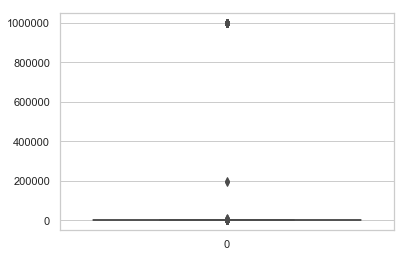

In [24]:
sns.set(style="whitegrid")
sns.boxplot(data=wellcome_apc_spend['Cost'])

Need to remove the obvious outlier(s)

In [25]:
wellcome_apc_spend.drop(wellcome_apc_spend[(wellcome_apc_spend.Cost > 10000.0)].index, inplace=True)

In [26]:
wellcome_apc_spend.drop(wellcome_apc_spend[(wellcome_apc_spend.Cost < 10.0)].index, inplace=True)

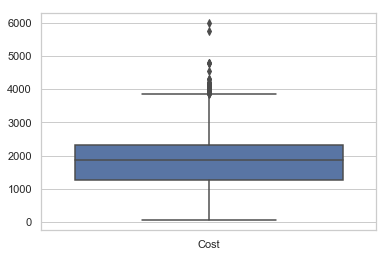

In [29]:
sns.set(style="whitegrid")
sns.boxplot(data=wellcome_apc_spend)

Better.

In [30]:
wellcome_apc_spend.describe()

,Cost
count,2062.000000
mean,1826.181489
std,767.458149
min,45.940000
25%,1269.740000
50%,1861.785000
75%,2302.930000
max,6000.000000


Min of 0, looks like there's just one but should be removed

Mean, median, std. etc for cost

In [31]:
wellcome_apc_spend.describe()

,Cost
count,2062.000000
mean,1826.181489
std,767.458149
min,45.940000
25%,1269.740000
50%,1861.785000
75%,2302.930000
max,6000.000000


In [34]:
wellcome_apc_spend.groupby('Journal title', sort=True).describe()

Cost               \
                                                   count         mean   
Journal title                                                           
ACADEMY OF NUTRITION AND DIETETICS                   1.0  2379.540000   
ACS CHEMICAL BIOLOGY                                 5.0  1418.186000   
ACS CHEMICAL NEUROSCIENCE                            1.0  1186.800000   
ACS NANO                                             2.0   668.140000   
ACTA CRYSTALLOGRAPHICA SECTION D,  BIOLOGICAL C...   1.0   771.420000   
ACTA CRYSTALLOGRAPHICA SECTION D: BIOLOGICAL CR...   4.0   763.817500   
ACTA CRYSTALLOGRAPHICA SECTION F: STRUCTURAL BI...   2.0   796.635000   
ACTA DERMATO VENEREOLOGICA                           1.0   653.960000   
ACTA DIABETOLOGICA                                   1.0  2336.280000   
ACTA F                                               1.0   754.900000   
ACTA NEUROPATHOL                                     1.0  1901.040000   
ACTA NEUROPATHOLOGICA                                3.0  2161.063333   
ACTA OPTHALMOLOGICA                                  1.0  2270.160000   
ACTA PHYSIOL                                         1.0  1991.500000   
ADDICTION                                            2.0  2136.225000   
ADVANCES IN EXPERIMENTAL MEDICINE AND BIOLOGY        4.0  1928.457500   
AGE                                                  2.0  2170.140000   
AGE AND AGEING                                       1.0  2040.000000   
AGEING & SOCIETY                                     1.0  1695.000000   
AGING CELL                                           1.0  1970.570000   
AIDS                                                 3.0  2059.306667   
AIDS BEHAV                                           1.0  1834.770000   
AIDS CARE                                            4.0  2294.225000   
AIDS JOURNAL                                         1.0  2015.720000   
AIDS RESEARCH AND THERAPY                            1.0  1240.000000   
AIDS UK                                              2.0  1836.920000   
ALCOHOL AND ALCOHOLISM                               1.0  2040.000000   
ALIMENTRARY PHARMACOLOGY & THERAPEUTICS              2.0  2373.590000   
AM J BIOETH                                          1.0  1804.190000   
AM J TROP MED HYG                                    1.0  1152.500000   
...                                                  ...          ...   
TISSUE ENGINEERING: PART A                           1.0  1741.320000   
TRAFFIC                                              6.0  2129.338333   
TRANSACTIONS OF THE ROYAL SOCIETY OF TROPICAL M...   1.0  1524.080000   
TRANSLATIONAL PSYCHIATRY                             2.0  2880.000000   
TRENDS IN COGNITIVE SCIENCE                          1.0  2340.630000   
TRENDS IN GENETICS                                   2.0  2370.935000   
TRENDS IN MICROBIOLOGY                               1.0  2291.330000   
TRENDS IN MOLECULAR MEDICINE                         1.0  2248.330000   
TRENDS IN NEUROSCIENCE                               1.0  2402.810000   
TRENDS IN NEUROSCIENCES                              1.0  2426.960000   
TRENDS IN PARASITOLOGY                               3.0  2257.653333   
TRIALS                                               3.0  1212.300000   
TRIALS                                               1.0  1165.000000   
TROP MED INT HEALTH                                  1.0  1834.770000   
TROPICAL ANIMAL HEALTH & PRODUCTION                  1.0  2054.780000   
TROPICAL MEDICINE AND INTERNATIONAL HEALTH           6.0  1843.163333   
TUBERCULOSIS                                         2.0  2161.255000   
URBAN HISTORY                                        1.0  2034.000000   
UROLITHIASIS                                         1.0  1112.400000   
VACCINE                                              5.0  1623.394000   
VASCULAR PHARMACOLOGY                                1.0  2352.530000   
VETERINARY MICROBIOLOGY              

In [33]:
wellcome_apc_spend.sort_values(['Cost'], ascending=False).groupby('Journal title', sort=False).describe()

Cost               \
                                                   count         mean   
Journal title                                                           
PUBLIC SERVICE REVIEW                                1.0  6000.000000   
THE LANCET NEUROLOGY                                 2.0  5040.000000   
ELSEVIER                                             7.0  2625.421429   
LANCET                                               1.0  4800.000000   
THE LANCET                                           3.0  4558.003333   
CELL HOST & MICROBE                                  1.0  4226.040000   
NEURON                                               9.0  3565.644444   
CELL                                                 4.0  3171.767500   
CURR BIOL.                                           1.0  4151.770000   
MOLECULAR CELL                                       3.0  3925.736667   
CURRENT BIOLOGY                                     11.0  3511.682727   
DEVELOPMENTAL CELL                                  12.0  3292.271667   
STRUCTURE                                            7.0  3881.824286   
CELL METABOLISM                                      3.0  3924.260000   
IMMUNITY                                             2.0  3934.750000   
CELL JOURNAL                                         1.0  4041.050000   
CELL REPORTS                                         9.0  3644.226667   
AMERICAN JOURNAL OF HUMAN GENETICS                   5.0  2684.510000   
CELL PRESS - CELL REPORTS                            1.0  3884.400000   
CELL HOST AND MICROBE                                1.0  3838.880000   
NATURE COMMUNICATIONS                               18.0  3134.133333   
ANTIMICROBIAL AGENTS & CHEMOTHERAPY                  5.0  1829.098000   
CELL STEM CELL                                       2.0  3534.065000   
THE AMERICAN JOURNAL OF HUMAN GENETICS               4.0  2437.452500   
LANCET GLOBAL HEALTH                                 1.0  3678.780000   
DEVELOPMENT CELL                                     1.0  3630.640000   
JOURNAL OD CLINICAL ENDOCRINOLOGY                    1.0  3602.410000   
BMJ                                                 10.0  2751.000000   
LANCET INFECT DIS                                    1.0  3600.000000   
NEGLECTED TROPICAL DISEASE                           2.0  3600.000000   
...                                                  ...          ...   
JOURNAL OF PARASITOLOGY RESEARCH                     1.0   623.950000   
PROCEDDINGS OF THE NATIONAL ACADEMY OF SCIENCES...   1.0   619.830000   
JOURNAL OF MEDICAL VIROLOGY                          1.0   612.590000   
BMC GENOMICS                                         1.0   608.520000   
EPIGENTICS                                           2.0   508.660000   
PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES...   2.0   584.675000   
AUTOPHAGY                                            1.0   601.100000   
JOURNAL OF HISTORICAL GEOGRAPHY                      1.0   596.460000   
RNA BIOLOGY                                          3.0   490.123333   
HEALTH                                               1.0   551.270000   
THERANOSTICS                                         1.0   543.290000   
JOURNAL OF VISUALIZED EXPERIEMENTS                   1.0   517.500000   
EPIGENETICS                                          2.0   490.485000   
NEUROSCIENTIST                                       1.0   480.930000   
FRONTIERS IN COGNITIVE SCIENCE                       1.0   434.700000   
J INFECT DIS                                         1.0   378.780000   
HAEMATOLOGICA/THE HAEMATOLOGY JOURNAL                1.0   378.700000   
FRONTIERS IN GENETICS                                1.0   346.250000   
PHYSICS IN BIOLOGY AND MEDICINE\n                    1.0   340.000000   
CELL ADHESION AND MIGRATION                          1.0   321.460000   
JOURNAL OF MEDICINAL CHEMISTRY                       1.0   321.120000   
ESSAYS IN BIOCHEMISTRY               